# Part 1: warm-up

#### Task 1

- Fit the equation using polyfit() and print the a , b parameters
- Plot your model with the 50 data points, i.e., the curve that corresponds to the equation from above.
- Compute and print the R^2 coefficient using Numpy.
- Explain how the polyfit() function  nds the optimal parameters. (1-2 sentences)
- Give two differences between this method and the gradient descent one. Write a short sentence for each one.

In [165]:
#fit y=alog(x)+b
import pandas as pd
data = pd.read_csv("warm-up/task-1.csv")
data.head(2)

,x,y
0,10.529,39.105
1,10.799,40.584


In [166]:
import numpy as np
x = data.x.values
y = data.y.values
xlog = np.log(x)
a,b = np.polyfit(xlog, y, deg=1)

In [167]:
print("Coefficient a= %f, coefficient b= %f" %(a,b))

Coefficient a= 3.390241, coefficient b= 31.529201


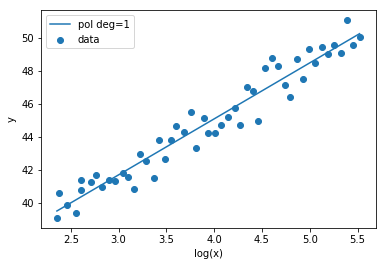

In [168]:
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xlog,y, label="data")
plt.plot(xlog, a*xlog+b, label="pol deg=1")
plt.xlabel('log(x)')
plt.ylabel('y')
plt.legend()


In [169]:
#R^2 coefficient
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y,y_pred)))
coefs=[a,b]
y_pred = np.polyval(coefs, xlog)

#1-rss_model/rss_baseline
R_score = 1-RSS(y,y_pred)/RSS(y,y.mean())
print(R_score)

0.9411567093138288


Q | A
--|:--
How the polyfit() function finds the optimal parameters? | ```polyfit()``` fits a polynomial of a given degree to a set of points and then uses least squares method to find an optimal solution.
Give two differences between this method and the gradient descent one. Write a short sentence for each one. | 1. OLS is analytical, while GD is iterative. 2. Unlike the OLS method, GD is very generic and can optimize many different cost functions

Least Squares | Gradient Descent
-- |: --
Least Squares minimizes the squared error of $\sum_{j=0}^k (p(x_j)-y(x_j))^2$. This is an analytical solution, and it is suitable for linear regressions with the RSS cost functions. LSS looks for a point in the parameter space of (a,b), which has a derivative of RSS of zero in all directions, i.e. computes the gradient of the cost function. | Gradient Descent is an iterative algorithm, which can be used more generically with various models and cost functions. It also uses a gradient of a cost function to minimize it. The cost function, however, must be convex, otherwise the algorithm can return sub-optimal solutions. It is good to use if there is no analytical solution. 



#### Task 2

- Load and split the data into 80-20 train/test sets using train_test_split(). Set the random_state to zero.
- Fit and evaluate a linear regression using the train/test set methodology. 
- Print the mean absolute error (MAE) on the test set.
- Improve your test MAE by removing outliers from the train set.
- Fit a linear regression with Huber loss (using the train points with outliers). Print its MAE on the test set.

In [170]:
data = pd.read_csv("warm-up/task-2.csv")
data.head(2)

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231


In [171]:
X = data.drop(['y'], axis=1)

In [172]:
y = data.y

In [173]:
#split train-test
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split?

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split

In [174]:
X_tr, X_te, y_tr, y_te= train_test_split(X, y, train_size=0.8, random_state = 0)

/anaconda3/envs/exts-aml1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [175]:
X_tr.shape

(800, 3)

In [176]:
y_tr.shape

(800,)

In [177]:
#fit linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
y_pred = lr.predict?

In [ ]:
y_pred = lr.predict

In [179]:
y_pred = lr.predict(X_te)

In [180]:
def MAE(y, y_pred):
    return (np.sum(np.abs(y-y_pred))/len(y))

In [181]:
print("Model MAE is %f" %MAE(y_te, y_pred))
print("Baseline MAE is %f" %MAE(y_te, np.median(y_te)))


Model MAE is 104.788433
Baseline MAE is 115.002600


Model is better than the baseline.

In [182]:
#removing outliers with z-score, i.e. those with more than 2 std dev away
z_scores = (y_tr - y_tr.mean()) / y_tr.std()
z_scores_te = (y_te - y_te.mean()) / y_te.std()

In [183]:
idx = np.abs(z_scores)>2
idx_te = np.abs(z_scores_te)>2

In [184]:
lr.fit(X_tr[~idx], y_tr[~idx])
y_pred2 = lr.predict(X_te[~idx_te])
print("Model MAE is %f" %MAE(y_te, y_pred))
print("Baseline MAE is %f" %MAE(y_te, np.median(y_te)))
print("No outliers MAE is %f" %MAE(y_te[~idx_te], y_pred2))

Model MAE is 104.788433
Baseline MAE is 115.002600
No outliers MAE is 97.953490


In [185]:
#Huber loss
from sklearn.linear_model import HuberRegressor
hub = HuberRegressor()
hub.fit(X_tr,y_tr)
y_predh = hub.predict(X_te)
print("Model MAE is %f" %MAE(y_te, y_pred))
print("Baseline MAE is %f" %MAE(y_te, np.median(y_te)))
print("No outliers MAE is %f" %MAE(y_te[~idx_te], y_pred2))
print("Huber regression MAE is %f" %MAE(y_te, y_predh))


Model MAE is 104.788433
Baseline MAE is 115.002600
No outliers MAE is 97.953490
Huber regression MAE is 83.908124


#### Task 3


- Split data into 50-50 train/test sets using . Set the to zero.
- Fit a polynomial of degree 10 to the train set. Print its residual sum of squares (RSS) on the train/test sets. Does your model overfit?
- Plot your model with the 50 data points, i.e., the curve that corresponds to your polynomial regression.
- Apply regularization using ridge regression. Tune the regularization strength using grid search.
- Compute the train/test RSS of your (tuned) ridge regression model and plot the new curve.

In [186]:
data = pd.read_csv("./warm-up/task-3.csv")
data.head(2)

,x,y
0,3.588,0.473
1,3.551,0.784


In [187]:
x = data.x.values
y = data.y.values
#split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.5, random_state=0)

/anaconda3/envs/exts-aml1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [188]:
len(y_te)

25

In [189]:
#fit a polynomial
coeff = np.polyfit(x_tr,y_tr, deg=10)
y_val_tr= np.polyval(coeff,x_tr)
y_val_te= np.polyval(coeff,x_te)

def RSS(y, y_pred):
    return np.sum(np.square((y-y_pred)))

In [190]:
#RSS on the train/test sets
print("Train set: %f" %RSS(y_tr, y_val_tr))
print("Test set: %f" %RSS(y_te, y_val_te))

Train set: 0.636766
Test set: 1.397276


The model strongly overfits.

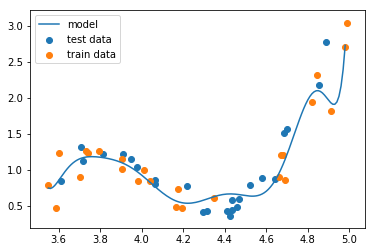

In [191]:
#plot model
x_plot = np.arange(np.min(x), np.max(x), 0.01)
y_plot = np.polyval(coeff,x_plot)
plt.plot(x_plot, y_plot, label="model")
plt.scatter(x_te, y_te, label="test data")
plt.scatter(x_tr, y_tr, label="train data")
plt.legend()

- Apply regularization using ridge regression. Tune the regularization strength using grid search.
- Compute the train/test RSS of your (tuned) ridge regression model and plot the new curve.

In [192]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X = poly_obj.fit_transform(x[:,np.newaxis],y)
x_values = np.linspace(min(x), max(x), num=100)
x_values_poly = poly_obj.transform(x_values[:, np.newaxis])

In [193]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.5, random_state=0)

In [194]:
#ridge regression with default alpha
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_tr, y_tr)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

RSS of test set is 0.917074
RSS of train set is 1.123992


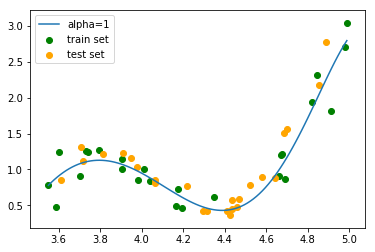

In [195]:
y_val_rg = ridge.predict(x_values_poly) 
y_pred_rg = ridge.predict(X_te)
print("RSS of test set is %f" %RSS(y_pred_rg, y_te))
y_pred_rg = ridge.predict(X_tr)
print("RSS of train set is %f" %RSS(y_pred_rg, y_tr))

plt.plot(x_values, y_val_rg, label="alpha=1")
#plt.scatter(x_te, y_te)
plt.scatter(X_tr[:, 0], y_tr, label='train set', color='green')
plt.scatter(X_te[:, 0], y_te, label='test set', color='orange')
plt.legend()

In [196]:
#tuning the regularization strength
alphas = np.logspace(-20, 10, num=100)

In [197]:
from sklearn.metrics import mean_squared_error as mse
#save errors
train_sets = []
test_sets = []

# grid search
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)
    y_val_rg_tr = ridge.predict(X_tr)
    train_sets.append(mse(y_tr, y_val_rg_tr))
    
    y_val_rg_te = ridge.predict(X_te)
    test_sets.append(mse(y_te,y_val_rg_te))


/anaconda3/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.223259610884488e-22 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9288482305254113e-22 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.992148268779153e-22 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-c

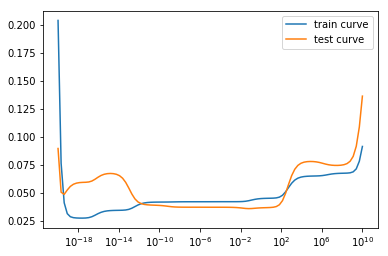

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.semilogx(alphas, train_sets, label='train curve')
plt.semilogx(alphas, test_sets, label='test curve')
plt.legend()
plt.show()

In [199]:
numb = abs(np.array(test_sets)-np.array(train_sets)).min()

In [200]:
idx = np.where((np.array(test_scores)-np.array(train_scores))==numb)[0]

In [201]:
idx

array([27])

In [202]:
alphas[idx]

array([1.51991108e-12])

RSS of test set is 1.012426
RSS of train set is 1.008358


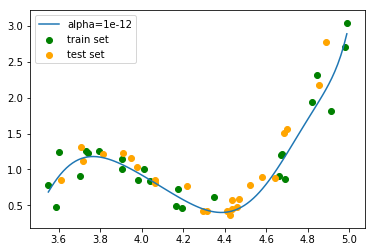

In [204]:
#new ridge regression
ridge = Ridge(alpha=alphas[idx])
ridge.fit(X_tr, y_tr)
y_val_rg = ridge.predict(x_values_poly) 
y_pred_rg = ridge.predict(X_te)
print("RSS of test set is %f" %RSS(y_pred_rg, y_te))

y_pred_rg = ridge.predict(X_tr)
print("RSS of train set is %f" %RSS(y_pred_rg, y_tr))
plt.plot(x_values, y_val_rg, label="alpha=1e-12")
#plt.scatter(x_te, y_te)
plt.scatter(X_tr[:, 0], y_tr, label='train set', color='green')
plt.scatter(X_te[:, 0], y_te, label='test set', color='orange')
plt.legend()